<a href="https://colab.research.google.com/github/michael-glum/MachineLearning/blob/main/3_Layer_Neural_Network_For_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run the following code to download the MNIST dataset


In [ ]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()
#    print ((load()[0]).shape)
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

if __name__ == '__main__':
    init()

Download complete.
Save complete.


# Numpy implementation
The load() function will return the training and test dataset

In [ ]:
import numpy as np
from urllib import request
import gzip
import math
import pickle



def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)

        training_images, training_labels, testing_images, testing_labels = mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
        # Normalize the images
        training_images.astype('float32')
        testing_images.astype('float32')
        training_images = training_images / 255
        testing_images = testing_images / 255
        return training_images, training_labels, testing_images, testing_labels


TRimg,TRlab,TSimg,TSlab=load()
print(len(TRimg),len(TRlab),len(TSimg),len(TSlab))
print(len(TRimg[0]),len(TRlab),len(TSimg[0]),len(TSlab))

arr_2d = np.reshape(TRimg[0], (28, 28))

epochs = 10
batchSize = 32 # or 128
lr = 0.1 # or 0.01 or 0.001

np.random.seed(0)

h=200
W=lr*np.random.randn(784, 200)
b=np.zeros((1, h))
h2=50
W2=lr*np.random.randn(200,50)
b2=np.zeros((1, h2))
h3=10
W3=lr*np.random.randn(50,10)
b3=np.zeros((1, h3))

step_size = batchSize
reg = 1e-3

for x in range(epochs):
  batchStart = 0
  i = 0
  while i < 60000:
    if 60000 - (i + batchSize) < 0:
      step_size = 60000 - i
      i += step_size
    else:
      i += batchSize

    batch = TRimg[batchStart:i]
    labels = TRlab[batchStart:i]
    scores = np.empty([batchSize,h3])


    # calculate hidden layers
    hidden_layer1=np.maximum(0,np.dot(batch,W)+b)
    hidden_layer2=np.maximum(0,np.dot(hidden_layer1,W2)+b2)
    scores=np.dot(hidden_layer2,W3)+b3

    # calculate output layer
    exp_scores=np.exp(scores)
    probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)

    num_examples = batch.shape[0]
    correct_logprobs=-np.log(probs[range(num_examples), labels])
    data_loss=np.sum(correct_logprobs)/num_examples
    reg_loss=0.5*reg*np.sum(W*W)+0.5*reg*np.sum(W2*W2)+0.5*reg*np.sum(W3*W3)
    loss=data_loss+reg_loss

    if i%3000==0:
      print("iteration %d: loss %f" % (i,loss))

    batchStart = i

    dscores=probs
    dscores[range(num_examples), labels]-=1
    dscores/=num_examples

    dw3=np.dot(hidden_layer2.T,dscores)
    db3=np.sum(dscores, axis=0,keepdims=True)

    dhidden2=np.dot(dscores,W3.T)
    dhidden2[hidden_layer2 <=0]=0

    dw2=np.dot(hidden_layer1.T,dhidden2)
    db2=np.sum(dhidden2,axis=0,keepdims=True)

    dhidden=np.dot(dhidden2,W2.T)
    dhidden[hidden_layer1 <=0]=0

    dw=np.dot(batch.T,dhidden)
    db=np.sum(dhidden, axis=0,keepdims=True)

    dw3+=reg*W3
    dw2+=reg*W2
    dw+=reg*W

    W+=-lr*dw
    b+=-lr*db
    W2+=-lr*dw2
    b2+=-lr*db2
    W3+=-lr*dw3
    b3+=-lr*db3






60000 60000 10000 10000
784 60000 784 10000
iteration 12000: loss 1.033194
iteration 24000: loss 1.171413
iteration 36000: loss 0.890956
iteration 48000: loss 0.768000
iteration 60000: loss 0.666515
iteration 12000: loss 0.652162
iteration 24000: loss 0.680489
iteration 36000: loss 0.593643
iteration 48000: loss 0.544788
iteration 60000: loss 0.480006
iteration 12000: loss 0.485317
iteration 24000: loss 0.479842
iteration 36000: loss 0.432525
iteration 48000: loss 0.404388
iteration 60000: loss 0.359523
iteration 12000: loss 0.374334
iteration 24000: loss 0.364174
iteration 36000: loss 0.340760
iteration 48000: loss 0.318734
iteration 60000: loss 0.279363
iteration 12000: loss 0.297520
iteration 24000: loss 0.287435
iteration 36000: loss 0.276574
iteration 48000: loss 0.256604
iteration 60000: loss 0.226388
iteration 12000: loss 0.234374
iteration 24000: loss 0.241939
iteration 36000: loss 0.232846
iteration 48000: loss 0.215933
iteration 60000: loss 0.188207
iteration 12000: loss 0.20

In [ ]:
hidden_layer1=np.maximum(0,np.dot(TSimg,W)+b)
hidden_layer2=np.maximum(0,np.dot(hidden_layer1,W2)+b2)
scores=np.dot(hidden_layer2,W3)+b3
predicted_class=np.argmax(scores,axis=1)
print("training accuracy: %.2f" % (np.mean(predicted_class==TSlab)))

training accuracy: 0.97


## If you are interested in what the data looks like. You can run the following code to see.

6


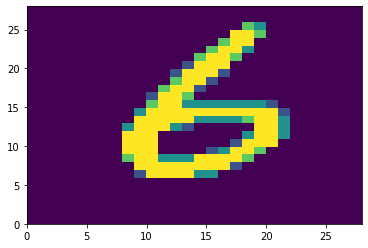

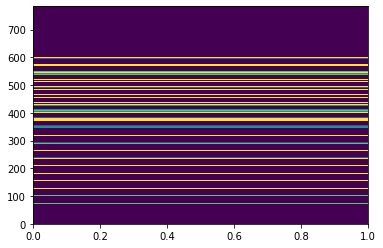

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

showInd=66
Column=np.reshape(TRimg[showInd], (784, 1))
arr_2d = np.reshape(TRimg[showInd], (28, 28))
arr_2dT=np.rot90(arr_2d)
arr_2dTA=np.rot90(arr_2dT)
Final=np.fliplr(arr_2dTA)
#arr_2dTA=np.transpose(arr_2dT)
#arr_2dTB=np.transpose(arr_2dTA)
plt.pcolor(Final)
print(TRlab[showInd])
plt.show()

plt.pcolor(Column)
plt.show()

#pcm = plt.pcolormesh(arr_2d,cmap='RdBu_r')
#plt.colorbar(pcm)
#plt.show()

# [For dataset loading in Pytorch, you can refer to the following example code](https://github.com/pytorch/examples/blob/master/mnist/main.py)

https://github.com/pytorch/examples/blob/master/mnist/main.py 


In [ ]:
import os
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
  
  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    sample = {"image": image, "label": label}
    return sample


train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 200),
        nn.ReLU(),
        nn.Linear(200, 50),
        nn.ReLU(),
        nn.Linear(50, 10),
        nn.ReLU()
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

batch = 128
learning_rate = 0.1 # or 0.01 or 0.001

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    # Compute prediction and loss
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100==0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= size
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


epochs = 10
for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
  print("Done!")

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=10, bias=True)
    (5): ReLU()
  )
)
Predicted class: tensor([0])
Epoch 1
-------------------------
loss: 2.303690 [    0/60000]
loss: 0.831231 [ 3200/60000]
loss: 0.487881 [ 6400/60000]
loss: 0.360394 [ 9600/60000]
loss: 0.451005 [12800/60000]
loss: 0.196018 [16000/60000]
loss: 0.327802 [19200/60000]
loss: 0.197296 [22400/60000]
loss: 0.131264 [25600/60000]
loss: 0.287865 [28800/60000]
loss: 0.212819 [32000/60000]
loss: 0.388266 [35200/60000]
loss: 0.201947 [38400/60000]
loss: 0.186875 [41600/60000]
loss: 0.109582 [44800/60000]
loss: 0.068072 [48000/60000]
loss: 0.235175 [51200/60000]
loss: 0.152902 [54400/60000]
loss: 0.057095 [57600/60000]
Test Error: 
 Accuracy: 95.1%, Avg l